## Нагадування по Markdown

Надаємо невелике нагадування записів в
[Markdown](https://colab.research.google.com/notebooks/markdown_guide.ipynb) (LaTeX):

Markdown | Preview
--- | ---
`**bold text**` | **bold text**
 \\$\frac{x}{y}\\$ | $\frac{x}{y}$
 \\$p^{x}_{y}\\$ | $p^{x}_{y}$
\\$x \cdot y\\$ | $x \cdot y$
\\$\sqrt{x}\\$ | $\sqrt{x}$
\\$\pi\\$ | $\pi$
\\$\approx\\$ | $\approx$

І ще декілька прикладів:

```markdown
$y=x^2$

$e^{i\pi} + 1 = 0$

$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$

$\frac{n!}{k!(n-k)!} = {n \choose k}$

$A_{m,n} =
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n}
 \end{pmatrix}$
```

$y=x^2$

$e^{i\pi} + 1 = 0$

$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$

$\frac{n!}{k!(n-k)!} = {n \choose k}$

$A_{m,n} =
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n}
 \end{pmatrix}$

 ---

## Завдання 1. Випадкове блукання
Ціна акцій компанії в кожен момент часу може з рівною ймовірністю збільшитись на 2 або зменшитись на 1. В початковий момент часу $t=0$ ціна рівна 0. Визнач середню ціну акції через 3 одиниці часу ($t=3$).  
а) Виріши аналітично.

б) Напиши симуляцію данного процесу. Порахуй середнє значення та намалюй гістограму ціни для 10, 100, 1000 та 10000 симуляцій.

x ~ Γ(0.3, 1.1) де Г — позначення гамма-розподілу.
Необхідно запустити симуляцію n = 100 разів для різних значень часу t.

а) Побудуй гістограму розподілу x.

б) Запусти симуляцію з t від 1 до, наприклад, ~60 з кроком, наприклад, 1 або 2.

---
Розв'язання:

$X_0 = 0$

Кожен крок:

p = 0.5 - ціна збільшується на 2

q = 0.5 - ціна зменьшується на 1

Математичне сподівання одного кроку:

$E(x) = 0.5 * 2 + 0.5 * (-1) = 0.5$

Математичне сподівання трьох кроків:

$E(x_3) = E[x_0] + 3 * E(x) = 0 + 3 * 0.5 = 1.5$

ВІдповідь; середнє значення ціни через 3 одиниці часу = 1.5

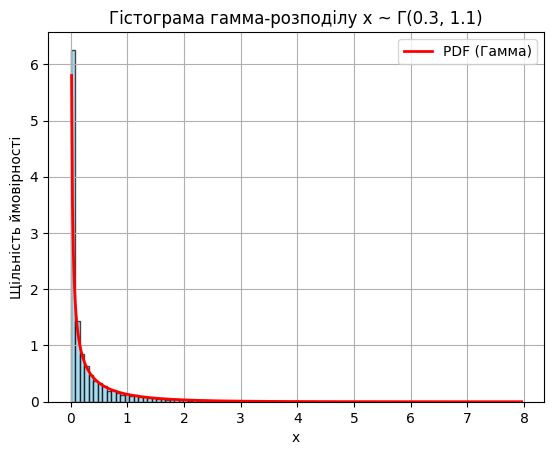

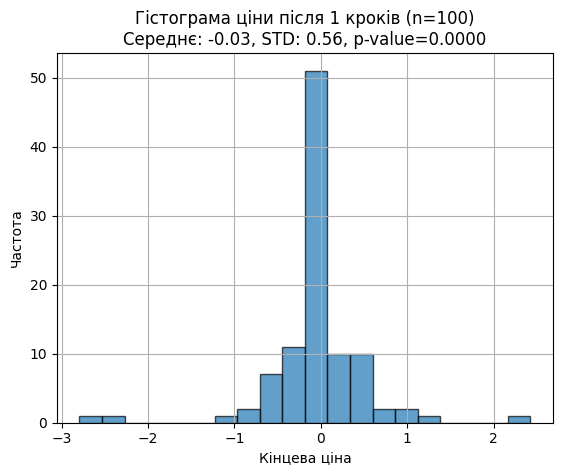

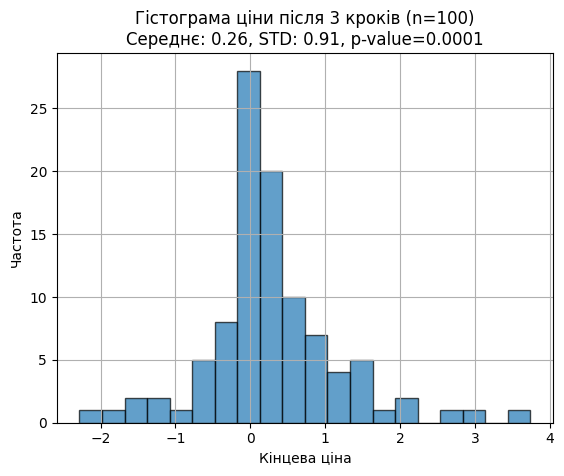

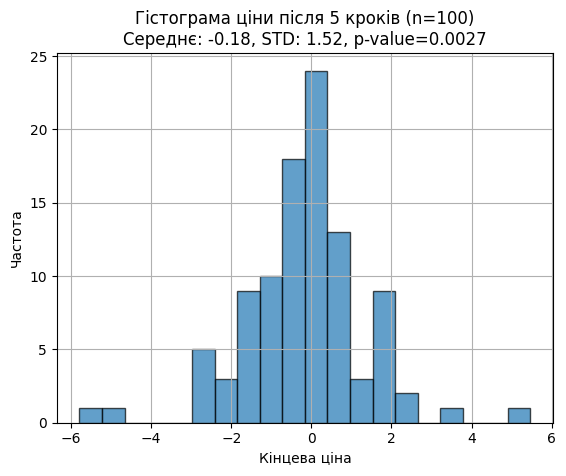

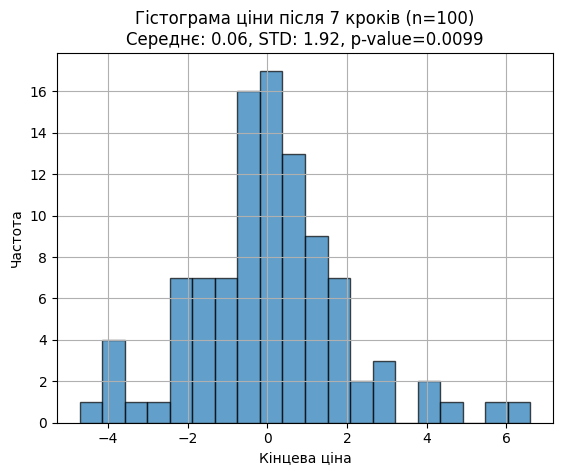

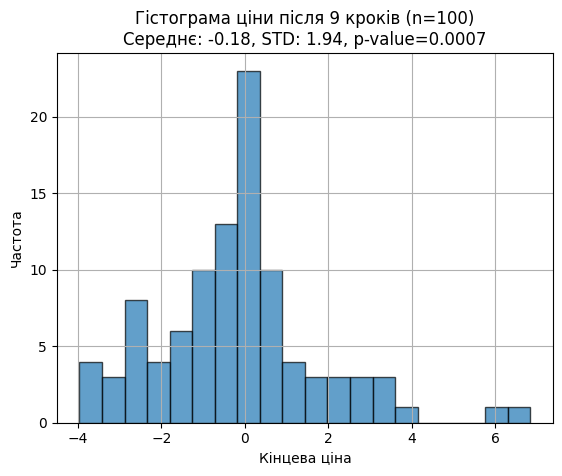

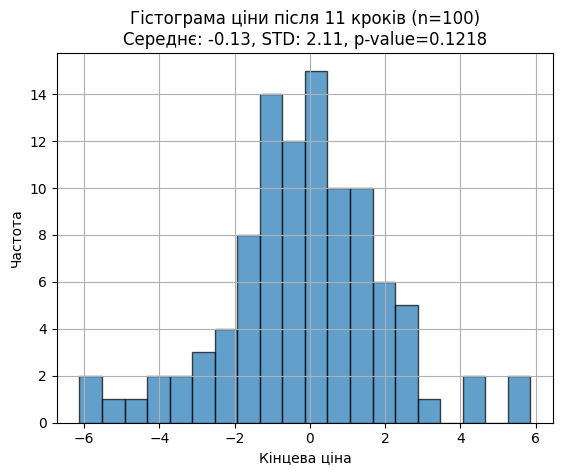

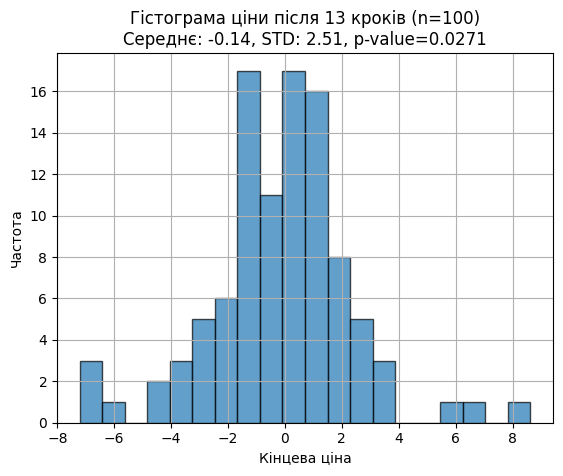

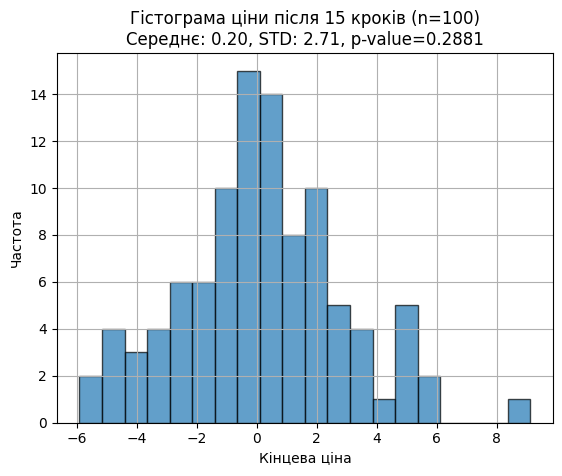

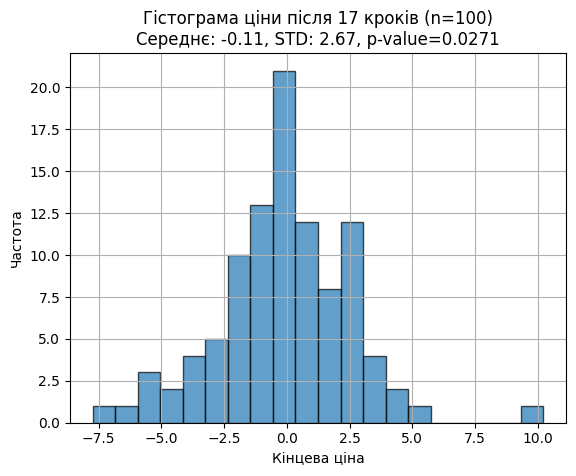

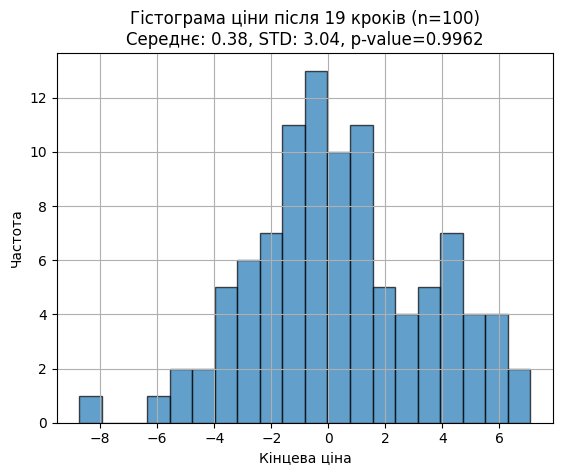

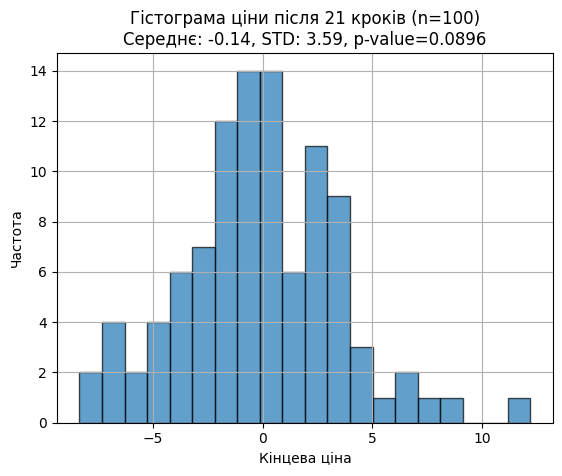

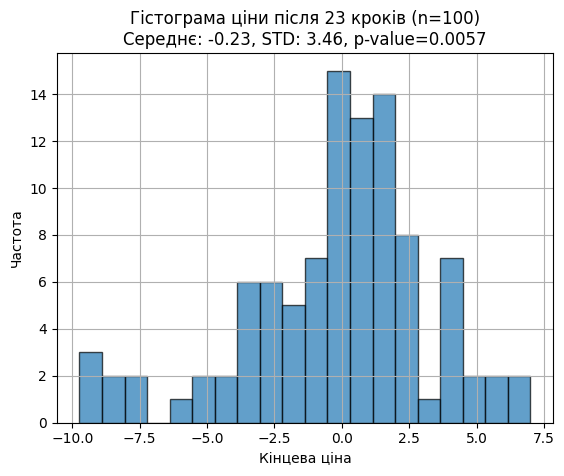

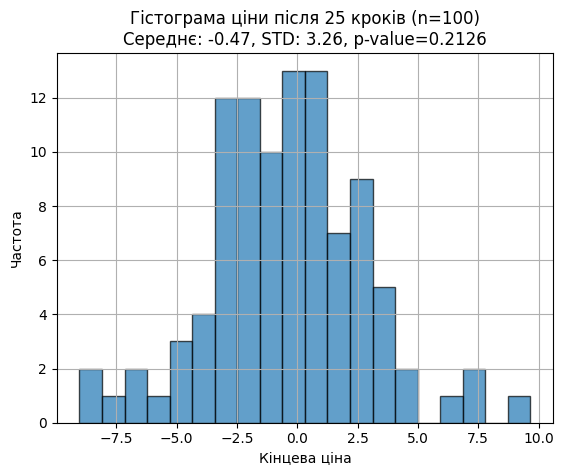

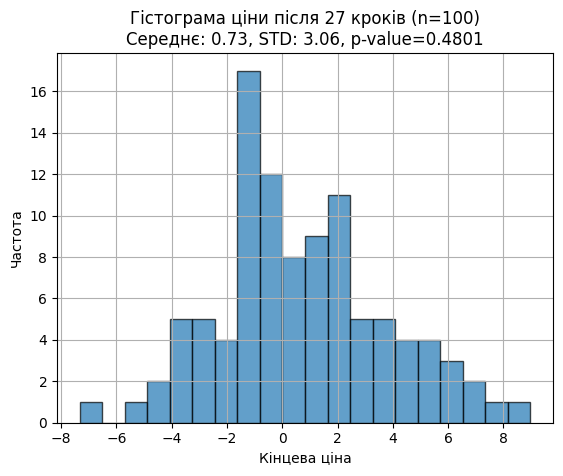

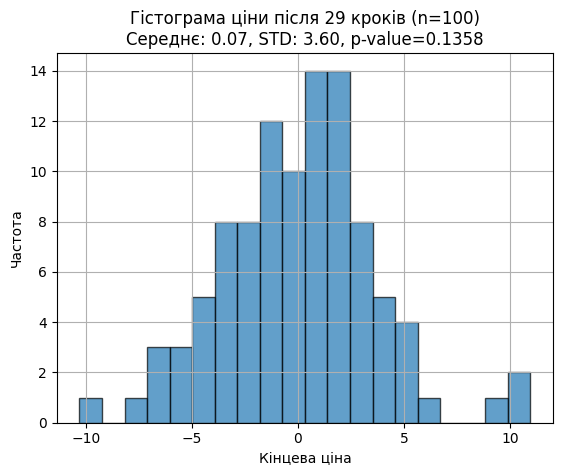

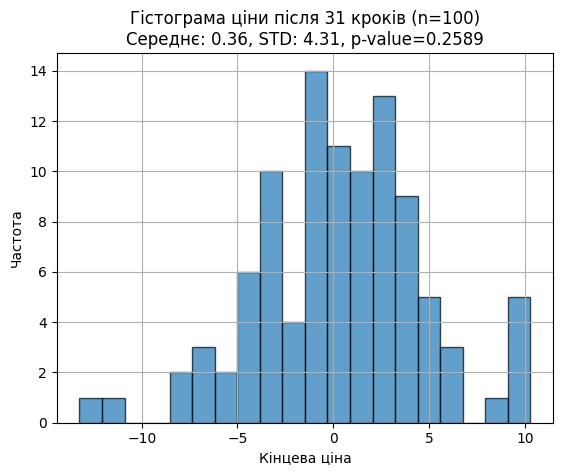

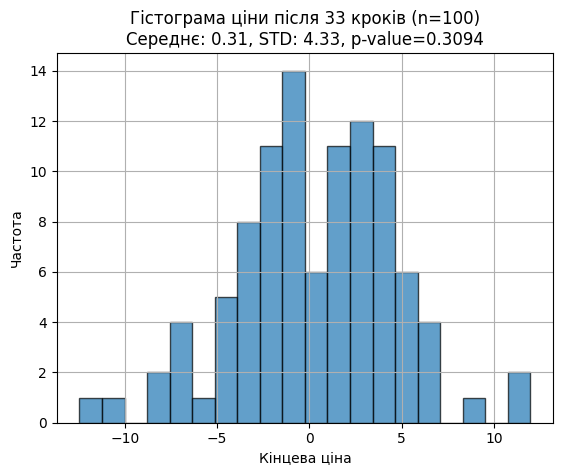

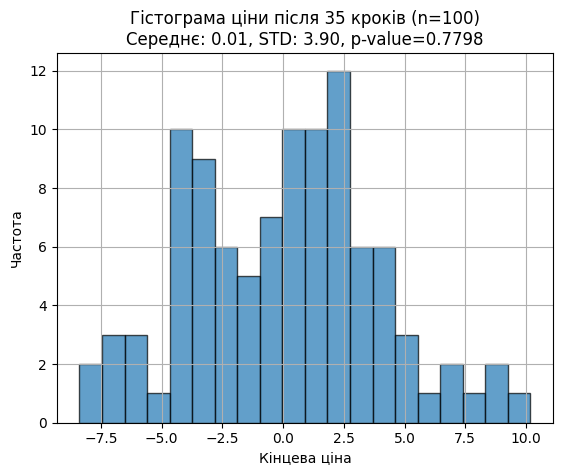

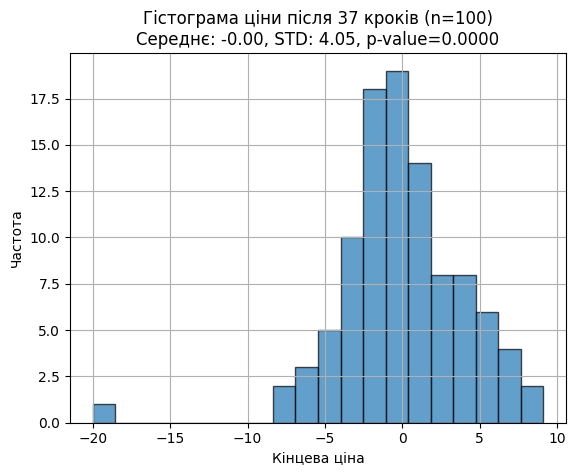

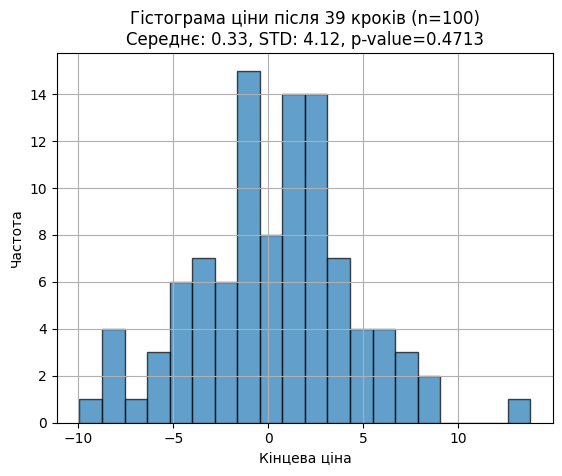

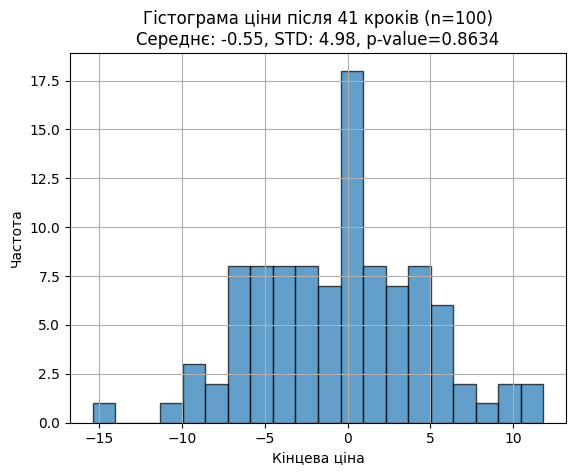

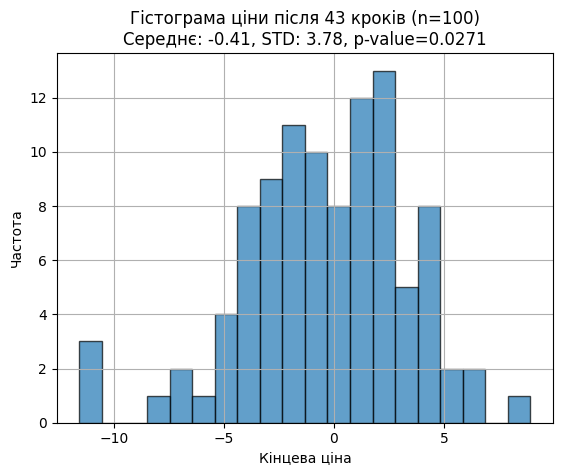

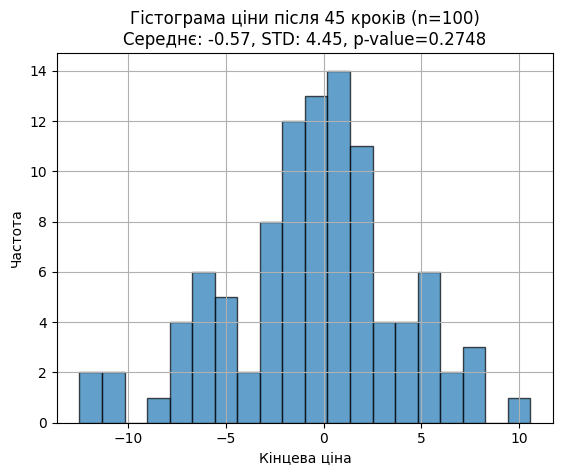

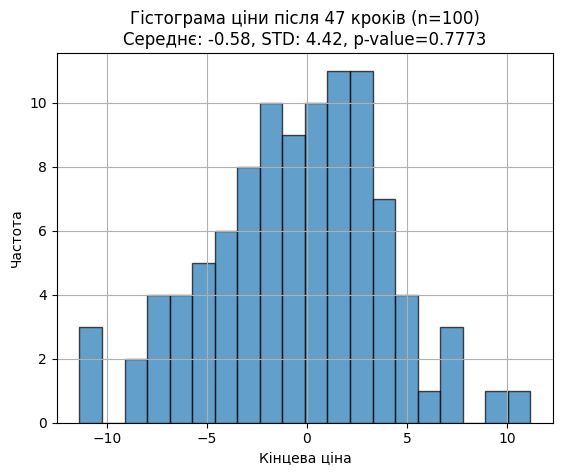

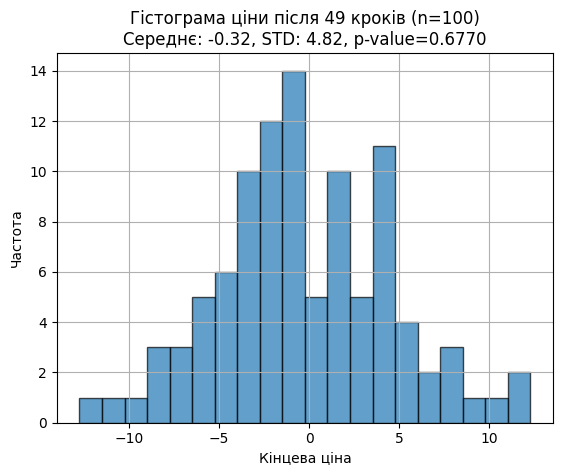

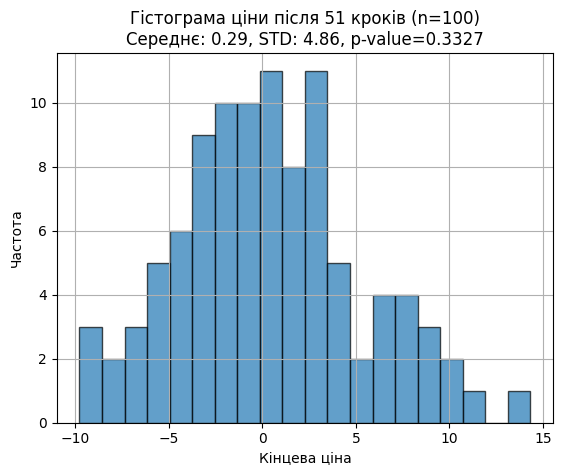

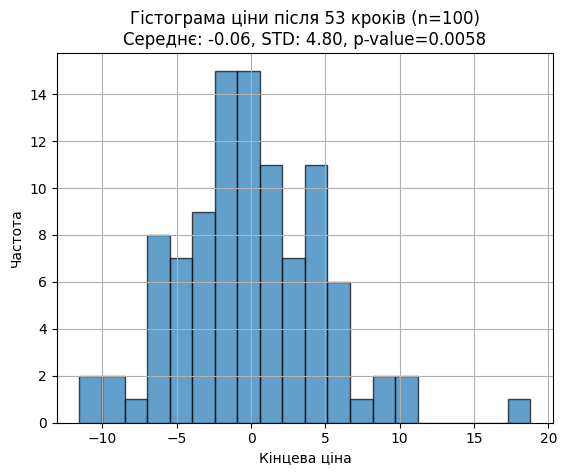

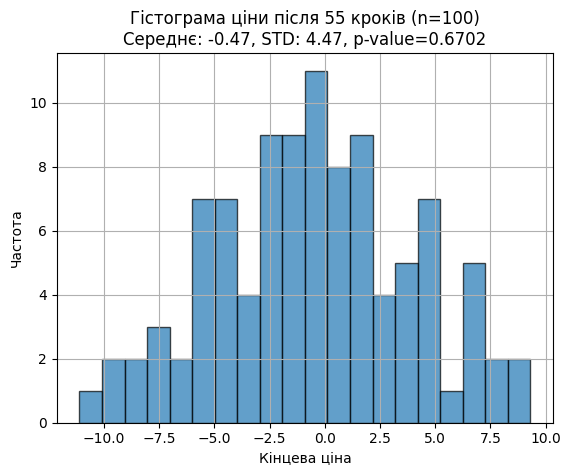

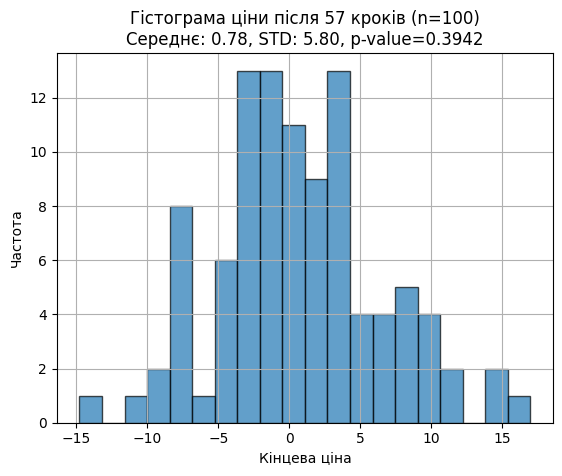

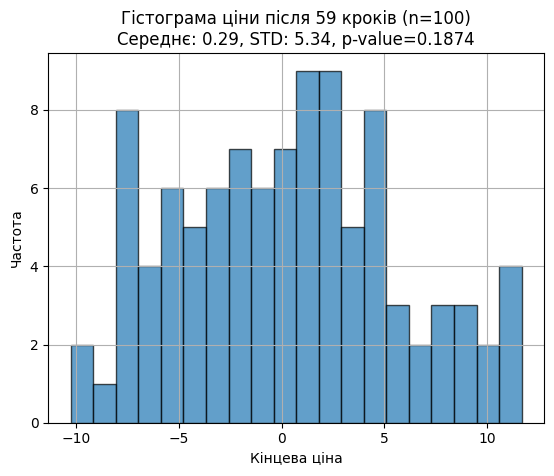

Симуляцій: 10, Середнє значення: 2.4000


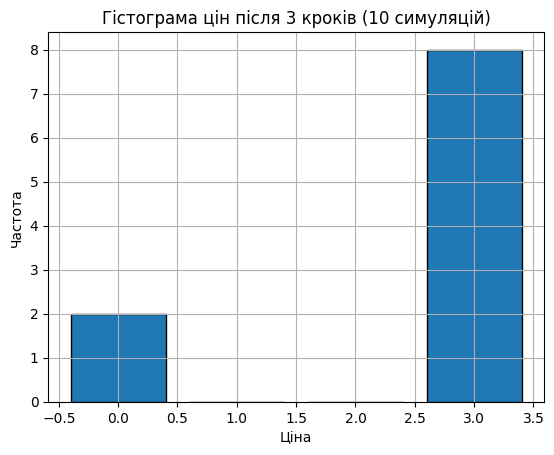

Симуляцій: 100, Середнє значення: 1.5600


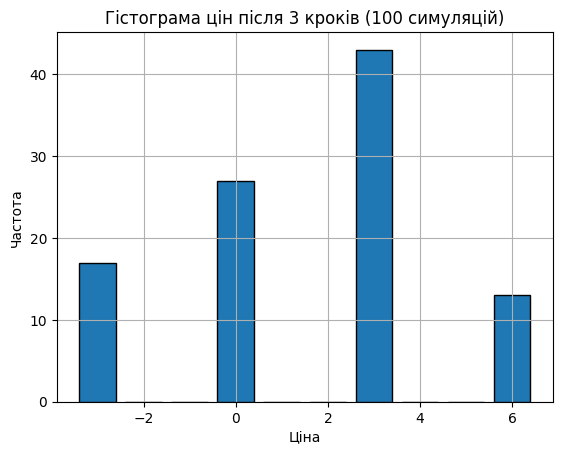

Симуляцій: 1000, Середнє значення: 1.5810


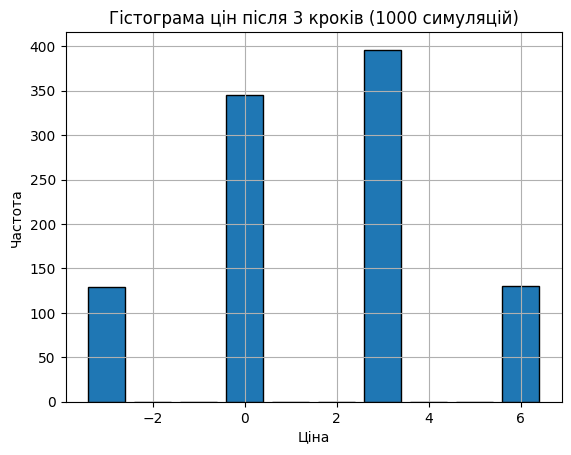

Симуляцій: 10000, Середнє значення: 1.5288


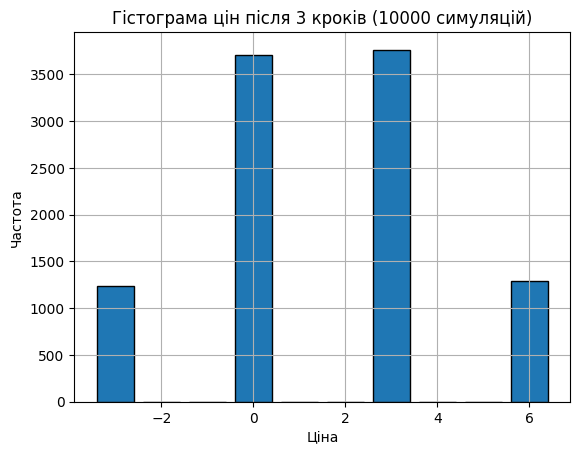

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.stats import normaltest


# Параметри гамма-розподілу
shape = 0.3
scale = 1.1

# Генерація даних
samples = np.random.gamma(shape=shape, scale=scale, size=10000)


# Побудова гістограми
plt.hist(samples, bins=100, density=True, alpha=0.7, color='skyblue', edgecolor='black')
x = np.linspace(0, max(samples), 500)
plt.plot(x, gamma.pdf(x, a=shape, scale=scale), 'r-', lw=2, label='PDF (Гамма)')
plt.title("Гістограма гамма-розподілу x ~ Γ(0.3, 1.1)")
plt.xlabel("x")
plt.ylabel("Щільність ймовірності")
plt.grid(True)
plt.legend()
plt.show()

# Графік сильно асиметричний — більшість значень x розміщені близько до нуля, а рідко трапляються великі значення.

# Це типовий вигляд для гамма-розподілу з малим параметром форми (α = 0.3).

#  Такі розподіли підходять для моделювання частих малих змін і рідкісних великих змін (наприклад, ринки, де часто трапляються малі рухи, але іноді — великі стрибки).

def simulate_gamma_walk(n: int, t: int, shape: float = 0.3, scale: float = 1.1) -> np.ndarray:
    steps = np.random.gamma(shape=shape, scale=scale, size=(n, t))
    # Ціна може як зростати, так і спадати, тому вводимо випадкові знаки ±
    signs = np.random.choice([1, -1], size=(n, t))
    signed_steps = steps * signs
    final_prices = signed_steps.sum(axis=1)
    return final_prices

n_simulations = 100
t_values = range(1, 61, 2)
p_values = []

for t in t_values:
    results = simulate_gamma_walk(n_simulations, t)
    mean = np.mean(results)
    std = np.std(results)

    # Перевірка на нормальність (тест D’Agostino and Pearson)
    stat, p = normaltest(results)
    p_values.append(p)

    plt.hist(results, bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Гістограма ціни після {t} кроків (n={n_simulations})\nСереднє: {mean:.2f}, STD: {std:.2f}, p-value={p:.4f}')
    plt.xlabel('Кінцева ціна')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

# При малих t (наприклад, t=1–5) розподіл сильно асиметричний та не схожий на нормальний.

# Починаючи з більших t (приблизно після t > 30), розподіл стає все більш схожим на нормальний, що узгоджується з центральною граничною теоремою.

#  p-value зростає зі збільшенням t, що свідчить про те, що гіпотеза нормальності з часом стає більш прийнятною.

# із збільшенням кількості кроків (t) дані все більше підкоряються нормальному розподілу — тому і STD, і p-value зростають

def simulate_n_times(n: int, t: int = 3) -> list:
  outcomes = np.random.choice([2, -1], size=(n, t))
  final_prices = outcomes.sum(axis=1)
  return final_prices

for n in [10, 100, 1000, 10000]:
    results = simulate_n_times(n)
    mean_price = np.mean(results)
    print(f"Симуляцій: {n}, Середнє значення: {mean_price:.4f}")

    plt.hist(results, bins=range(min(results), max(results) + 2), align='left', rwidth=0.8, edgecolor='black')
    plt.title(f'Гістограма цін після 3 кроків ({n} симуляцій)')
    plt.xlabel('Ціна')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

## Завдання 2

Для кожної колонки порахуй середнє значення, дисперсію, стандартне відхилення, побудуй гістограму розподілу показника, перевір на нормальність розподілу та порахуй кореляцію з Product_Sold.

Платформа: TV
  Середнє: 517.43
  Дисперсія: 82733.43
  Стандартне відхилення: 287.63
  p-value нормальності: 0.0000 (ненормальний)



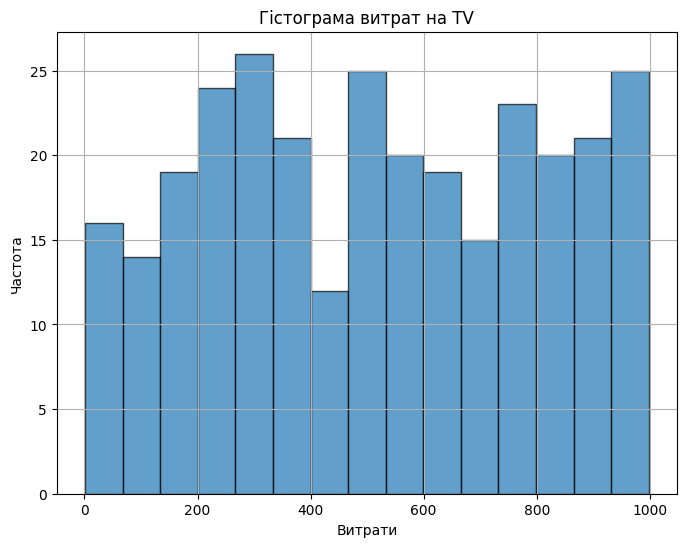

Платформа: Billboards
  Середнє: 502.64
  Дисперсія: 75835.38
  Стандартне відхилення: 275.38
  p-value нормальності: 0.0000 (ненормальний)



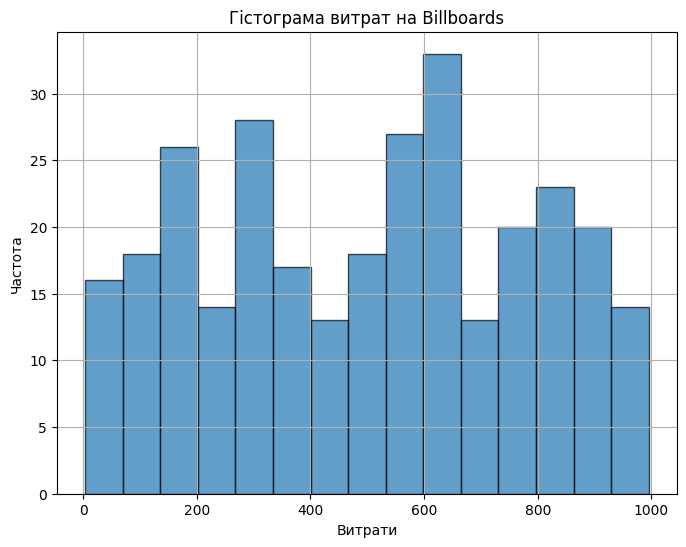

Платформа: Google_Ads
  Середнє: 512.44
  Дисперсія: 81194.38
  Стандартне відхилення: 284.95
  p-value нормальності: 0.0000 (ненормальний)



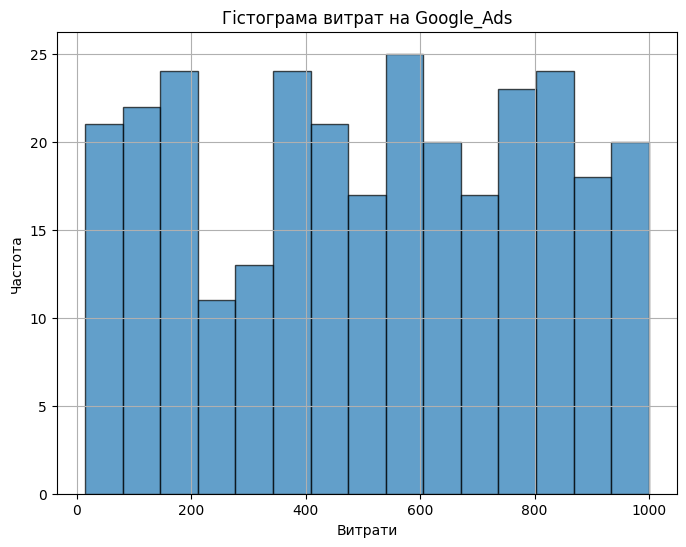

Платформа: Social_Media
  Середнє: 489.80
  Дисперсія: 74762.36
  Стандартне відхилення: 273.43
  p-value нормальності: 0.0000 (ненормальний)



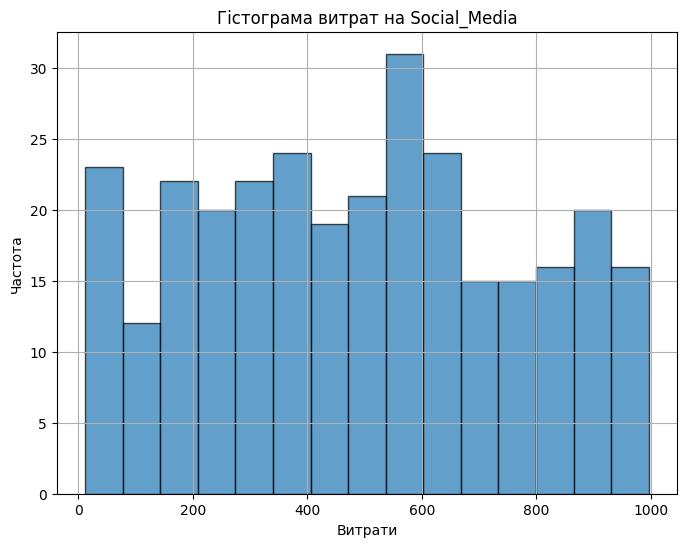

Платформа: Influencer_Marketing
  Середнє: 465.73
  Дисперсія: 82847.93
  Стандартне відхилення: 287.83
  p-value нормальності: 0.0000 (ненормальний)



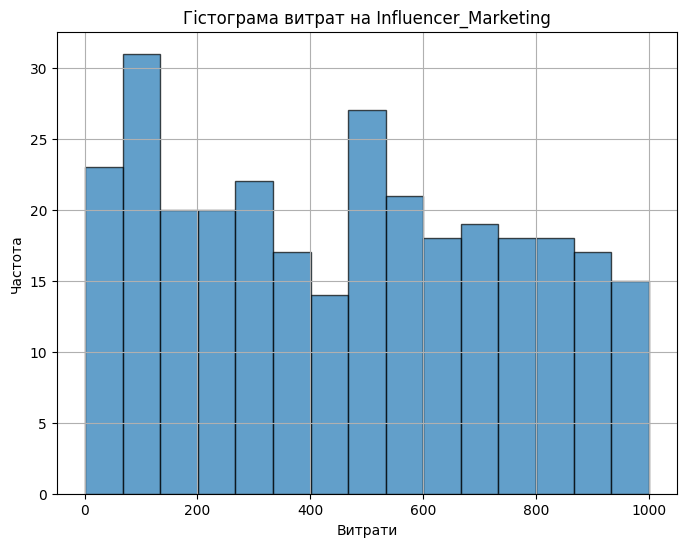

Платформа: Affiliate_Marketing
  Середнє: 484.43
  Дисперсія: 77001.71
  Стандартне відхилення: 277.49
  p-value нормальності: 0.0000 (ненормальний)



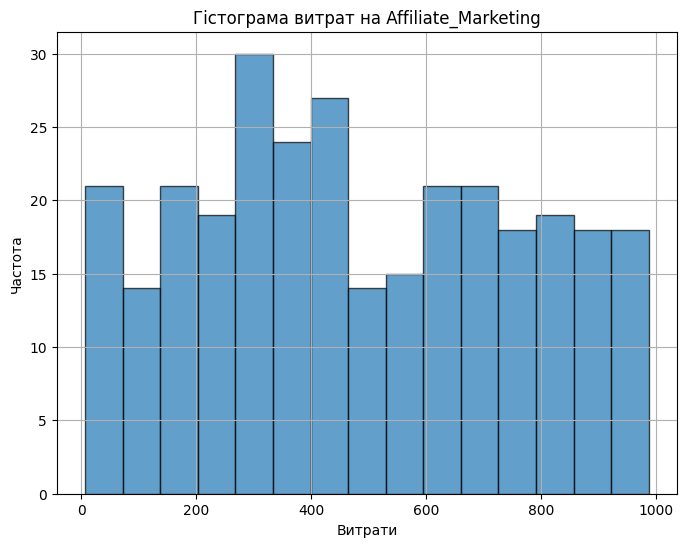

Кореляція з кількістю проданих одиниць товару:
TV                      0.374228
Billboards              0.480593
Google_Ads              0.203678
Social_Media            0.401088
Influencer_Marketing    0.140844
Affiliate_Marketing     0.611603
dtype: float64


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest

# Завантаження даних з Google Sheets
url = 'https://docs.google.com/spreadsheets/d/18WCpPS96Tb3cB0FCsIA92PEhcmBkp08sjYhS9DsQfJE/edit#gid=954244094'
url = url[:url.find('/edit')] + '/export?format=csv'
df = pd.read_csv(url)

# Список платформ
platforms = ['TV', 'Billboards', 'Google_Ads', 'Social_Media', 'Influencer_Marketing', 'Affiliate_Marketing']

# Обчислення статистик та перевірка нормальності
for platform in platforms:
    data = df[platform]

    # Обчислення середнього, дисперсії та стандартного відхилення
    mean = np.mean(data)
    variance = np.var(data)
    std_dev = np.std(data)

    # Перевірка нормальності
    stat, p_value = normaltest(data)
    normality = "нормальний" if p_value > 0.05 else "ненормальний"

    # Виведення результатів
    print(f"Платформа: {platform}")
    print(f"  Середнє: {mean:.2f}")
    print(f"  Дисперсія: {variance:.2f}")
    print(f"  Стандартне відхилення: {std_dev:.2f}")
    print(f"  p-value нормальності: {p_value:.4f} ({normality})\n")

    # Побудова гістограми
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=15, edgecolor='black', alpha=0.7)
    plt.title(f'Гістограма витрат на {platform}')
    plt.xlabel('Витрати')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

# Обчислення кореляції з кількістю проданих одиниць товару
correlations = df[platforms].corrwith(df['Product_Sold'])
print("Кореляція з кількістю проданих одиниць товару:")
print(correlations)

# Тест відхиляє нормальність, ймовірно, через скошеність, виброси або реальну структуру даних
